# Language Detection model

**Objective:** This is a language detection model designed to predict language of a given text. It uses a text dataset, preprocesses the data, and applies two Naive Bayes classifiers (Gaussian Naive Bayes and Multinomial Naive Bayes) to perform the task of language identification. It uses many pyhton libraries such as pandas, numpy, matplotlib etc.

1. **Dataset & Preprocessing**
   - The dataset is loaded from a CSV file (language_identification.csv) using pandas.
   - A function named Preprocess() function is defined to text to lowercase & remove unwanted characters like punctuation, special characters, and numbers using regular expressions.
     

3. **Label Encoding:**
   - The target labels is encoded into numeric values using LabelEncoder from sklearn.preprocessing.
4. **Train-Test Split & Feature Extraction:**
     - The dataset is split into training and testing sets (80% for training and 20% for testing) using train_test_split from sklearn.model_selection.
     - A CountVectorizer from sklearn.feature_extraction.text is used to convert the text data into a matrix of token counts. This step converts the text into features that can be used by machine learning models.

5. **Model Training**
   - Two models : Gaussian Naive Bayes Model, Multinomial Naive Bayes Model are trained on train set
6. **Evaluation:**
   - Predictions are made on  test set, and accuracy, mean squared error, confusion matrix, and classification report are printed.
   - The confusion matrix is visualized using a heatmap.

8. **Saving the Models:**
   - Both MultinomialNB and CountVectorizer are saved using Pickle to disk:
       - Multi_NB.pkl: The trained Multinomial Naive Bayes model.
       - vectorizer.pkl: The trained CountVectorizer.

9. **Prediction on Sample Text:**
    - The models are used to predict the language of sample text.
    - A test sample (text = "hola, cómo estás") is passed through the vectorizer to transform it, and the Multinomial Naive Bayes model predicts the language.
    - The prediction is mapped back to the language using the label encoder (le.classes_).
  


## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt 


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report,ConfusionMatrixDisplay



In [2]:
df=pd.read_csv('Downloads/Python dataset/language_identification.csv')


In [3]:
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [4]:
df.shape

(22000, 2)

In [5]:
df['language'].value_counts()

language
Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: count, dtype: int64

## Visualisation using countplot

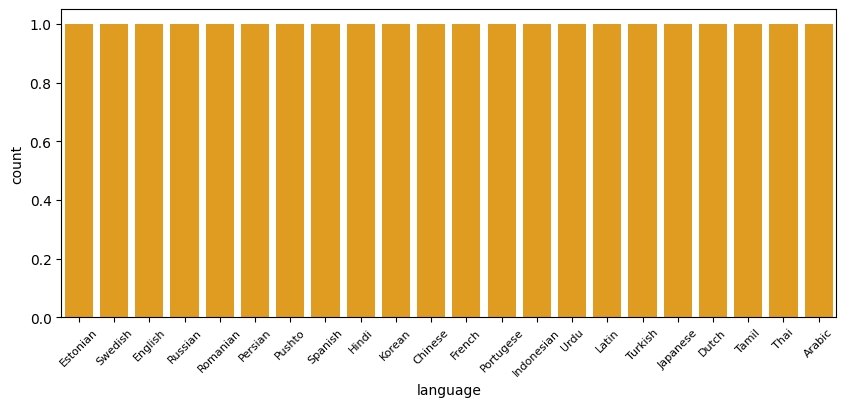

In [6]:
fig = plt.figure(figsize=(10,4))
sns.countplot(df['language'].value_counts(), color='orange')
plt.xticks(rotation=45, fontsize=8)
plt.show()

We can see from countplot, we are given a **Perfectly Balanced set**

## Defining function for preprocess the text

In [7]:
def preprocess(text):
    text = re.sub(r"[!@#$(),\n%^*?\&:;.~`0-9]",'',text.lower())
    return text

df['Text'] = df['Text'].apply(preprocess)

In [8]:
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [9]:
x= df['Text']
y = df['language']


## Label Encoding the target column

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y =le.fit_transform(y)

le.classes_

array(['Arabic', 'Chinese', 'Dutch', 'English', 'Estonian', 'French',
       'Hindi', 'Indonesian', 'Japanese', 'Korean', 'Latin', 'Persian',
       'Portugese', 'Pushto', 'Romanian', 'Russian', 'Spanish', 'Swedish',
       'Tamil', 'Thai', 'Turkish', 'Urdu'], dtype=object)

## Split dataset into train and test dataset

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=42 )

## CountVectorizer 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(X_train)

# # this step is needed for GaussianNB
x_train = cv.transform(X_train).toarray()   #transforming to array
x_test = cv.transform(X_test).toarray()

print(x_train)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Training Gaussian Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gnb = GaussianNB()      

gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)

ac1 = accuracy_score(y_test,y_pred1)
mse1 = mean_squared_error(y_test,y_pred1)
cm1= confusion_matrix(y_test,y_pred1)
cr1 = classification_report(y_test,y_pred1)


print('Accuracy score : ',ac1)
print('mse : ',mse1)



Accuracy score :  0.9436363636363636
mse :  8.001136363636364


Text(0.5, 1.0, 'Confusion Matrix - Gaussian Naive Bayes')

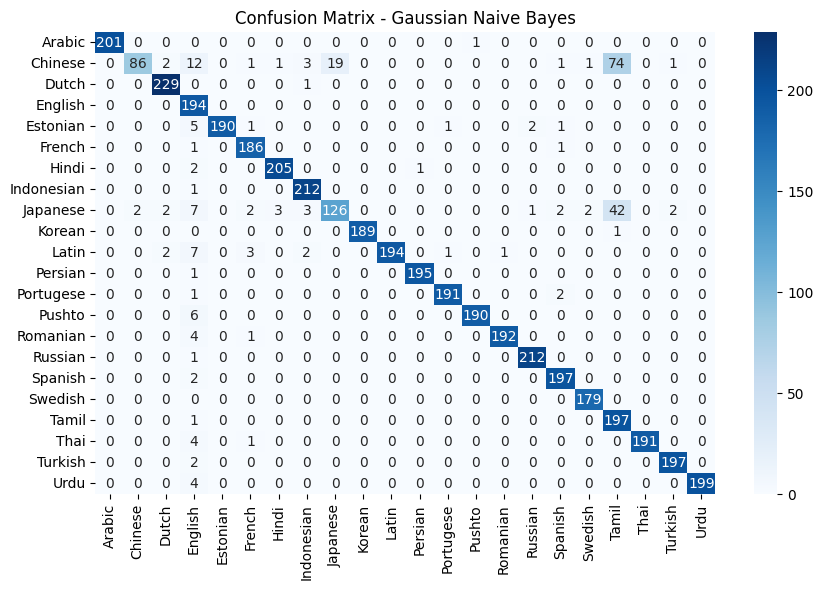

In [14]:
fig =plt.figure(figsize=(10,6))
sns.heatmap(cm1, annot=True, fmt='d', cmap="Blues",xticklabels=le.classes_, yticklabels=le.classes_)

plt.title(f"Confusion Matrix - Gaussian Naive Bayes")



In [15]:
print(cr1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       0.98      0.43      0.60       201
           2       0.97      1.00      0.98       230
           3       0.76      1.00      0.86       194
           4       1.00      0.95      0.97       200
           5       0.95      0.99      0.97       188
           6       0.98      0.99      0.98       208
           7       0.96      1.00      0.98       213
           8       0.87      0.65      0.74       194
           9       1.00      0.99      1.00       190
          10       1.00      0.92      0.96       210
          11       0.99      0.99      0.99       196
          12       0.99      0.98      0.99       194
          13       0.99      0.97      0.98       196
          14       0.99      0.97      0.98       197
          15       0.99      1.00      0.99       213
          16       0.97      0.99      0.98       199
          17       0.98    

## Train Multinomial Naive Bayes

In [16]:
model = MultinomialNB()

model.fit(x_train, y_train)

y_pred2 = model.predict(x_test)

ac2 = accuracy_score(y_test,y_pred2)
mse2 = mean_squared_error(y_test,y_pred2)
cm2 = confusion_matrix(y_test,y_pred2)
cr2 = classification_report(y_test,y_pred2)


print('Accuracy score : ',ac2)
print('mse : ',mse2)


Accuracy score :  0.9422727272727273
mse :  7.346136363636363


In [17]:
print(cr2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       0.96      0.49      0.65       201
           2       0.98      0.98      0.98       230
           3       0.68      1.00      0.81       194
           4       0.99      0.95      0.97       200
           5       0.94      0.99      0.97       188
           6       1.00      0.99      0.99       208
           7       1.00      0.98      0.99       213
           8       0.98      0.64      0.78       194
           9       0.99      0.99      0.99       190
          10       0.98      0.90      0.94       210
          11       1.00      0.99      1.00       196
          12       0.99      0.96      0.98       194
          13       1.00      0.96      0.98       196
          14       0.98      0.98      0.98       197
          15       0.99      0.99      0.99       213
          16       0.97      0.99      0.98       199
          17       0.60    

Text(0.5, 1.0, 'Confusion Matrix - Multiple Naive Bayes')

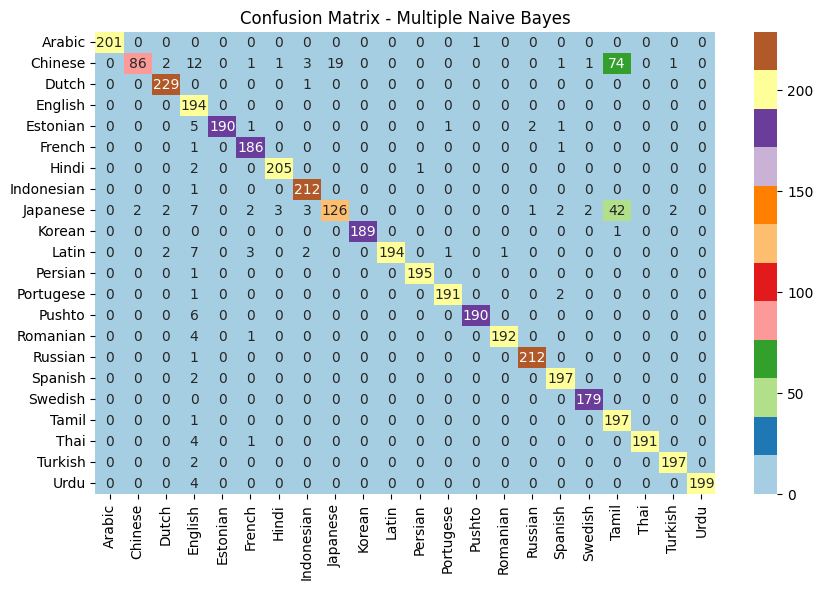

In [18]:
fig =plt.figure(figsize=(10,6))
sns.heatmap(cm1, annot=True, fmt='d', cmap="Paired",xticklabels=le.classes_, yticklabels=le.classes_)

plt.title(f"Confusion Matrix - Multiple Naive Bayes")

## Saving model 

In [19]:
import pickle
file1 = open('Multi_NB.pkl','wb')
file2 = open('vectorizer.pkl','wb')

pickle.dump(model,file1)
pickle.dump(cv,file2 )

file1.close()
file2.close()

## Sample test

In [20]:
text = "hola, cómo estás "

# for using gaussianNB
text = cv.transform([text]).toarray()

y = model.predict(text)
le.classes_[y]

array(['Spanish'], dtype=object)